[[564. 512.]
 [583. 508.]
 [594. 514.]
 [628. 499.]
 [641. 513.]
 [618. 503.]
 [663. 510.]]
lArrayNeg:  [1.06451416 1.06874139 1.07248973 1.07484717 1.07661673 1.07815357
 1.07861019 1.08379495 1.08476499 1.0854183  1.08606908 1.08644928
 1.08665252 1.08637089 1.08620426 1.08583051 1.08543827 1.08487595
 1.08442714 1.08344441 1.08263759 1.081971   1.08106381 1.08109497
 1.0820706  1.08404859 1.08726181 1.09226733 1.09838881 1.10557617
 1.11385983 1.12002502 1.12783765 1.13598577 1.14113432]
rArrayNeg:  [0.0493663  0.05617497 0.06300576 0.06814492 0.07491212 0.08003158
 0.08672768 0.09382931 0.09894999 0.10570438 0.11080533 0.11753799
 0.12425059 0.12924801 0.13591211 0.14088561 0.14749987 0.1540795
 0.15901785 0.16551051 0.17201274 0.17689535 0.18335084 0.18832036
 0.1950878  0.20204649 0.20762241 0.21521656 0.22145509 0.22960819
 0.23807394 0.24448895 0.25300806 0.26168911 0.26804821]
dArrayNeg:  [0.37263544 0.37263544 0.37263544 0.37263544 0.37263544 0.37263544
 0.37263544 0.37263544

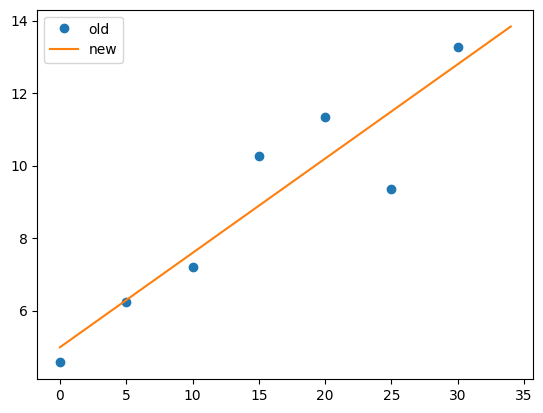

<Figure size 640x480 with 0 Axes>

In [91]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import cm
import mplcursors
from helper_funcs import *
from scipy import signal
from scipy.optimize import curve_fit
from scipy.optimize import fsolve


epsilonArray = np.load('output/outputEpsilon.npy')
xiPrimeNegArray = np.load('output/outputXiNeg.npy')
xiPrimePosArray = np.load('output/outputXiPos.npy')
centerArray = np.load('output/outputCenter.npy',allow_pickle=True)
print(centerArray)
radiusArray = np.load('output/outputRadius.npy')

rArrayPos = np.zeros(len(centerArray))
rArrayNeg = np.zeros(len(centerArray))

lArrayPos = np.zeros(len(centerArray))
lArrayNeg = np.zeros(len(centerArray))

epsilonPrimeArray = np.zeros(len(centerArray))

for i in range(len(centerArray)):

    xValue, yValue = centerArray[i][0], centerArray[i][1]
    xValue = xValue - 512
    yValue = yValue - 512

    xValue = xValue*45/512
    yValue = yValue*45/512

    epsilonPrimeArray[i] = np.sqrt(xValue**2 + yValue**2)

def linearFunc( x, m, b):
    return m*x + b

parameters, covariance = curve_fit(linearFunc, np.arange(15,50,5), epsilonPrimeArray)
epsilonPrimeArrayNew = linearFunc(np.arange(15,50), *parameters)

plt.figure()
plt.plot(np.arange(0,35,5),epsilonPrimeArray, 'o', label='old')
plt.plot(np.arange(0,35),epsilonPrimeArrayNew, '-', label='new')
plt.legend()
plt.figure()

    
rArrayNeg = np.zeros(len(epsilonPrimeArrayNew))
rArrayPos = np.zeros(len(epsilonPrimeArrayNew))
lArrayNeg = np.zeros(len(epsilonPrimeArrayNew))
lArrayPos = np.zeros(len(epsilonPrimeArrayNew))
dArrayNeg = np.zeros(len(epsilonPrimeArrayNew))
dArrayPos = np.zeros(len(epsilonPrimeArrayNew))

# for positive xi
for i in range(len(epsilonPrimeArrayNew)):

    xi = xiPrimePosArray[i]
    epsilon = epsilonArray[i]
    epsilonPrime = epsilonPrimeArrayNew[i]

    chi = 180 - epsilon - (90 - xi)
    s = np.sin(np.pi/2-np.deg2rad(xi))/np.sin(np.deg2rad(chi))
    r = s*np.tan(np.deg2rad(epsilon - epsilonPrime))
    l = np.sqrt(r**2 + s**2)
    d = np.sqrt(l**2 + 1**2 - 2*l*1*np.cos(np.deg2rad(epsilonPrime)))

    rArrayPos[i] = r
    lArrayPos[i] = l
    dArrayPos[i] = d

    # theta = 90 - xiPrimePosArray[i]
    # epsilon = epsilonArray[i]
    # chi = 180 - epsilon - theta
    # s = np.sin(np.deg2rad(theta))/np.sin(np.deg2rad(chi))


    # epsilonPrime = epsilonPrimeArrayNew[i]

    # r =  s*np.tan(np.deg2rad(epsilon - epsilonPrime))
    # rArrayPos[i] = r

    # l = np.sqrt(r**2 + s**2)
    # lArrayPos[i] = l

for i in range(len(epsilonPrimeArrayNew)):

    xi = xiPrimeNegArray[i]
    epsilon = epsilonArray[i]
    epsilonPrime = epsilonPrimeArrayNew[i]

    chi = 180 - epsilon - (90 - xi)
    s = np.sin(np.pi/2-np.deg2rad(xi))/np.sin(np.deg2rad(chi))
    r = s*np.tan(np.deg2rad(epsilon - epsilonPrime))
    l = np.sqrt(r**2 + s**2)

    rArrayNeg[i] = r
    lArrayNeg[i] = l
    dArrayNeg[i] = d

    # theta = 90 - xiPrimeNegArray[i]
    # epsilon = epsilonArray[i]
    # chi = 180 - epsilon - theta
    # s = np.sin(np.deg2rad(theta))/np.sin(np.deg2rad(chi))


    # epsilonPrime = epsilonPrimeArrayNew[i]
    
    # r =  s*np.tan(np.deg2rad(epsilon - epsilonPrime))
    # rArrayNeg[i] = r

    # l = np.sqrt(r**2 + s**2)
    # lArrayNeg[i] = l



print("lArrayNeg: ",lArrayNeg)
print("rArrayNeg: ",rArrayNeg)
print("dArrayNeg: ",dArrayNeg)
print("xiPrimeNegarray", xiPrimeNegArray)

print("lArrayPos: ",lArrayPos)
print("rArrayPos: ",rArrayPos)
print("dArrayPos: ",dArrayPos)
print("xiPrimePosarray", xiPrimePosArray)

print("epsilonArray: ", epsilonArray)


In [92]:
def trueXi(l, r, d, xiPrime):
    
    theta = np.arccos(r/l) + np.arccos((d**2 + l**2 - 1**2)/(2*l*d)) - np.pi

    return np.rad2deg(r*theta/(r+d)) + xiPrime

    # d = np.sqrt(l**2 + 1 - 2*l*np.cos(np.deg2rad(epsilon)))

    # chiPrime = np.rad2deg(np.arccos((l**2 + d**2 - 1)/(2*l*d)))

    
    # func = lambda xi :  -xiPrime + xi + r/(r+d)*(180 - chiPrime- np.rad2deg(np.arccos(r/l)))
    # sol = fsolve(func, xiPrime)

    # print("d: ", d)
    # print("l: ", l)
    # print("r: ", r)
    # print("epsilon: ", epsilon)
    # print("xiPrime: "   , xiPrime)
    # print("func(sol) = " , func(sol))
    # print("xi: ", sol)
    # if(xiPrime == sol):
    #     return np.nan
    # return sol



xiNegarray = np.zeros(35)
xiPosarray = np.zeros(35)

print("xiPrimeNegArray: ", xiPrimeNegArray)
print("xiPrimePosArray: ", xiPrimePosArray)

for i in range(35):
    if np.isnan(xiPrimeNegArray[i]) or np.isnan(xiPrimePosArray[i]):
        xiNegarray[i] = np.nan
        xiPosarray[i] = np.nan
        continue
    xiNegarray[i] = trueXi(lArrayNeg[i], rArrayNeg[i], dArrayNeg[i], xiPrimeNegArray[i])
    xiPosarray[i] = trueXi(lArrayPos[i], rArrayPos[i], dArrayPos[i], xiPrimePosArray[i])

print("xiNegarray: ", xiNegarray)
print("xiPosarray: ", xiPosarray)

xiPrimeNegArray:  [-20.85680809 -20.12029238 -19.28530269 -18.38742372 -17.1386563
 -16.15578928 -14.7453451  -14.50022169 -13.53732749 -12.3560748
 -11.42663098 -10.30241856  -9.19879157  -8.22534307  -7.14823318
  -6.23775419  -5.20548093  -4.18542454  -3.36303417  -2.34598274
  -1.39067372  -0.61653179   0.29706599   0.9285959    1.54117893
   2.0118717    2.20223893   2.29990838   2.16393622   2.05201267
   1.85121282   1.79351843   1.70828732   1.61979614   1.73075038]
xiPrimePosArray:  [36.15078704 36.64466486 37.04007912 37.19683886 37.17848976 37.25027169
 37.07025589 38.05490919 38.14670249 38.19591855 38.32116223 38.42741856
 38.55426032 38.63549932 38.78934646 38.93353921 39.13171757 39.34211399
 39.57439832 39.78780162 40.06294823 40.34464985 40.66147408 41.0845938
 41.70243767 42.46217411 43.32646218 44.45922577 45.65147183 46.99379118
 48.4249904  49.53731545 50.8529519  52.17185131 53.11553487]
xiNegarray:  [-23.5137147  -23.22191962 -22.83901837 -22.28004523 -21.4552853

In [93]:
maxImages = 20

posCoef = np.polyfit(np.arange(0,maxImages),xiPosarray[:maxImages],1)
print("pos m: ", posCoef[0])
print("pos b: ", posCoef[1])

posMean = np.mean(xiPosarray[:maxImages])
print("pos mean: ", posMean)
print("pos sigma:", np.std(xiPosarray[:maxImages]))

negCoef = np.polyfit(np.arange(0,maxImages),xiNegarray[:maxImages],1)
print("neg m: ", negCoef[0])
print("neg b: ", negCoef[1])

negMean = np.mean(xiNegarray[:maxImages])
print("neg mean: ", np.mean(negMean))
print("neg sigma:", np.std(xiNegarray[:maxImages]))

pos m:  0.20875220593585406
pos b:  47.93742815635285
pos mean:  49.920574112743466
pos sigma: 1.3056319052600351
neg m:  0.6186674307579356
neg b:  -23.98462882688127
neg mean:  -18.107288234680876
neg sigma: 3.5756662365034084


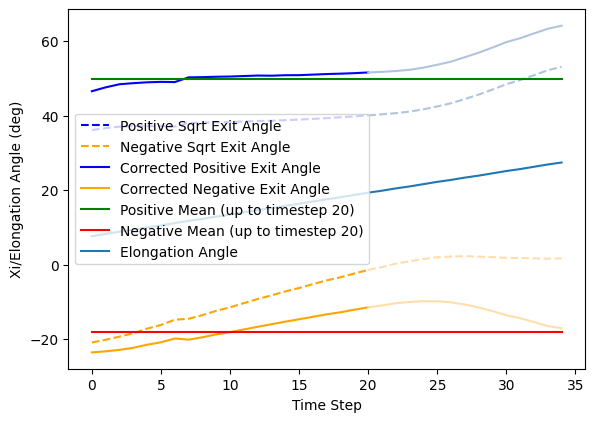

In [94]:
fig, axs = plt.subplots(figsize=(10/1.5,7/1.5))   
axs.plot(np.arange(0,35)[:maxImages+1],xiPrimePosArray[:maxImages+1], label='Positive Sqrt Exit Angle', color='blue', linestyle='dashed')
axs.plot(np.arange(0,35)[:maxImages+1],xiPrimeNegArray[:maxImages+1], label='Negative Sqrt Exit Angle', linestyle='dashed', color='orange') 
axs.plot(np.arange(0,35)[:maxImages+1],xiPosarray[:maxImages+1], label='Corrected Positive Exit Angle', linestyle='solid', color='blue')
axs.plot(np.arange(0,35)[:maxImages+1],xiNegarray[:maxImages+1], label='Corrected Negative Exit Angle', linestyle='solid', color='orange')

axs.plot(np.arange(0,35)[maxImages:],xiPrimePosArray[maxImages:], color='lightsteelblue', linestyle='dashed')
axs.plot(np.arange(0,35)[maxImages:],xiPrimeNegArray[maxImages:], linestyle='dashed', color='navajowhite') 
axs.plot(np.arange(0,35)[maxImages:],xiPosarray[maxImages:], linestyle='solid', color='lightsteelblue')
axs.plot(np.arange(0,35)[maxImages:],xiNegarray[maxImages:], linestyle='solid', color='navajowhite')

axs.plot(np.arange(0,35), np.full(35, posMean), label='Positive Mean (up to timestep 20)', color='green')
axs.plot(np.arange(0,35), np.full(35, negMean), label='Negative Mean (up to timestep 20)', color='red')
axs.plot(epsilonArray, label='Elongation Angle')
axs.set_ylabel('Xi/Elongation Angle (deg)')
axs.set_xlabel('Time Step')
axs.legend(loc='best') 
plt.show()

com_data:  [[0.84816273 0.08861014]
 [0.816505   0.10113733]
 [0.78864539 0.11648308]
 [0.74061622 0.14295411]
 [0.71233226 0.15854485]
 [0.6849936  0.17361292]
 [0.63793572 0.19954627]
 [0.61269187 0.21346264]
 [0.58782907 0.227159  ]
 [0.56773744 0.23823929]
 [0.54328667 0.25170932]]
frt_data:  [[0.82086065 0.11384155]
 [0.78043116 0.14727561]
 [0.7396387  0.17914099]
 [0.67203656 0.23317066]
 [0.63636635 0.25908804]
 [0.60029044 0.28526274]
 [0.53951239 0.33057206]
 [0.50615927 0.35456277]
 [0.47234955 0.37796261]
 [0.4486482  0.40235067]
 [0.41866245 0.43019382]]


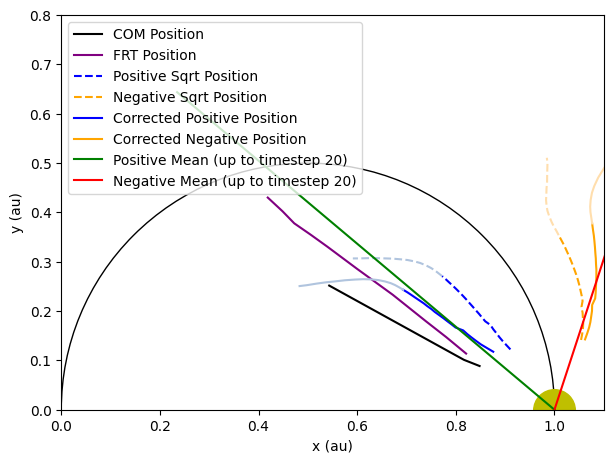

In [95]:
def calculatePositions(array, epsilonArray):
    positionArray = np.zeros((len(array),2))
    for i in range(len(array)):
        xi = array[i]
        epsilon = epsilonArray[i]
        cotXi = 1/np.tan(np.radians(xi))
        # print("cotXi = ", cotXi)
        tanE = np.tan(np.radians(epsilon))
        # print("tanE = ", tanE)
        x = cotXi/(tanE + cotXi)
        y = tanE*x
        positionArray[i] = np.array([x,y])
    
    return positionArray


fig, axs = plt.subplots(1,1, figsize=(7,7))
axs.plot(1,0, 'yo', markersize=30)

posPositionArray = calculatePositions(xiPrimePosArray, epsilonArray)
negPositionArray = calculatePositions(xiPrimeNegArray, epsilonArray)
posPositionArrayAdj = calculatePositions(xiPosarray, epsilonArray)
negPositionArrayAdj = calculatePositions(xiNegarray, epsilonArray)

# np.save("output_compare_data/posPositionArray.npy", posPositionArray)
# np.save("output_compare_data/negPositionArray.npy", negPositionArray)
# np.save("output_compare_data/posPositionArrayAdj.npy", posPositionArrayAdj)
# np.save("output_compare_data/negPositionArrayAdj.npy", negPositionArrayAdj)

com_data = np.load("output/com_data.npy")
frt_data = np.load("output/frt_data.npy")

# Rotate com_data and frt_data by 60 degrees around the point (0,1)
rotation_angle = np.deg2rad(-60)
rotation_matrix = np.array([[np.cos(rotation_angle), -np.sin(rotation_angle)],
                            [np.sin(rotation_angle), np.cos(rotation_angle)]])

com_data = np.dot(com_data[:, :2] - np.array([1, 0]), rotation_matrix) + np.array([1, 0])
frt_data = np.dot(frt_data[:, :2] - np.array([1, 0]), rotation_matrix) + np.array([1, 0])

print("com_data: ", com_data)  
print("frt_data: ", frt_data)



axs.plot(com_data[:,0],com_data[:,1], label='COM Position', color='black')
axs.plot(frt_data[:,0],frt_data[:,1], label='FRT Position', color='purple')


axs.plot(posPositionArray[:maxImages+1,0],posPositionArray[:maxImages+1,1],color='blue', label='Positive Sqrt Position', linestyle='dashed')
axs.plot(negPositionArray[:maxImages+1,0],negPositionArray[:maxImages+1,1],color='orange', label='Negative Sqrt Position', linestyle='dashed')
axs.plot(posPositionArrayAdj[:maxImages+1,0],posPositionArrayAdj[:maxImages+1,1],color='blue', label='Corrected Positive Position', linestyle='solid')
axs.plot(negPositionArrayAdj[:maxImages+1,0],negPositionArrayAdj[:maxImages+1,1],color='orange', label='Corrected Negative Position', linestyle='solid')

axs.plot(posPositionArray[maxImages:,0],posPositionArray[maxImages:,1],color='lightsteelblue', linestyle='dashed')
axs.plot(negPositionArray[maxImages:,0],negPositionArray[maxImages:,1],color='navajowhite', linestyle='dashed')
axs.plot(posPositionArrayAdj[maxImages:,0],posPositionArrayAdj[maxImages:,1],color='lightsteelblue', linestyle='solid')
axs.plot(negPositionArrayAdj[maxImages:,0],negPositionArrayAdj[maxImages:,1],color='navajowhite', linestyle='solid')



axs.plot([1,1+np.cos(np.deg2rad(posMean+90))],[0,np.sin(np.deg2rad(posMean+90))], color = 'green', label='Positive Mean (up to timestep 20)')
axs.plot([1,1 +np.cos(np.deg2rad(negMean+90))],[0,np.sin(np.deg2rad(negMean+90))], color = 'red', label='Negative Mean (up to timestep 20)')

thomson = plt.Circle((0.5, 0), 0.5, color='k', fill=False)
axs.add_patch(thomson)
axs.set_aspect('equal')
axs.set_ylim(0,0.8)
axs.set_xlim(0,1.1)


axs.set_xlabel('x (au)')
axs.set_ylabel('y (au)')

axs.legend(loc='upper left')

# plt.savefig("cme_correction_plot.png", dpi=300)

plt.show()
